# Bootcamp DIO: Geracao Tech Unimed-BH - Ciencia de Dados
## Modulo: Machine Learning


## Descrição do Desafio

O projeto consiste em aplicar o método de Transfer Learning em uma rede de Deep Learning na linguagem Python no ambiente COLAB.  

Para exemplo, utilizaremos o seguinte projeto que realiza Transfer Learning com o Dataset do MNIST: 
https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb 

O dataset utilizado engloba duas classes: gatos e cachorros. Uma descrição da base de dados pode ser visualizada neste link: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs. 

Já o dataset para download pode ser acessado por meio deste outro link:

https://www.microsoft.com/en-us/download/details.aspx?id=54765. 

# 01. Bibliotecas

In [22]:
import os

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras import applications


from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

# 02. Dataset

In [2]:

#root = '/content/drive/MyDrive/dio_ml/PetImages/'
root ='C:/Users/Documents/DIO/ml_transfer/PetImages/'
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]

print(categories)

['C:/Users/frmoriya/Documents/DIO/ml_transfer/Redes_Neurais_com_Transfer_Learning_e_CNN-main/PetImages/Cat', 'C:/Users/frmoriya/Documents/DIO/ml_transfer/Redes_Neurais_com_Transfer_Learning_e_CNN-main/PetImages/Dog']


# 03. Verifica arquivos corrompidos

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

In [ ]:
#path = Path('C:/Users/Documents/DIO/ml_transfer/PetImages/Cat').rglob("*.jpg")
path = Path('C:/Users/Documents/DIO/ml_transfer/PetImages/Dog').rglob("*.jpg")
for img_p in path:
    try:
        print(img_p)
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)
try: 
    os.remove("PetImages/Cat/666.jpg")
    print("removed")
except:
    print("can't remove") 
pass

# 04. Formatando as imagens 




In [3]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [4]:
# Load all the images from root folder
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        # print(img_path)
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

In [5]:
num_classes

2

In [6]:
# Randomize the data order.
random.shuffle(data)

# 05. Preparacao dos Dados: Treino / Validacao / Teste

In [7]:
# create training / validation / test split (70%, 15%, 15%)
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [8]:
# Separate data for labels.
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 

In [9]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_val = keras.utils.np_utils.to_categorical(y_val, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

print(y_test.shape)

(900, 2)


In [10]:
# Let's get a summary of what we have.
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 6000 images from 2 categories
train / validation / test split: 4200, 900, 900
training data shape:  (4200, 224, 224, 3)
training labels shape:  (4200, 2)


## Exemplos de imagens do Dataset

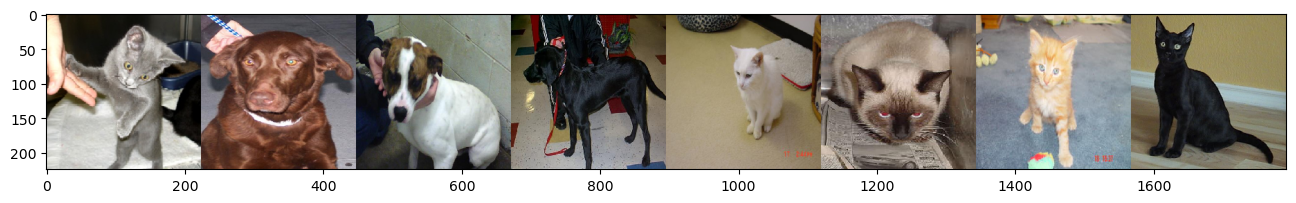

In [11]:
# Let's quickly look at a few sample images from our dataset.
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

# 06. Treinamento da Rede Neural

In [12]:
# First training a neural net from scratch
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                   

In [13]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
33/33 [==============================] - 185s 6s/step - loss: 0.6841 - accuracy: 0.5631 - val_loss: 0.6564 - val_accuracy: 0.6022
Epoch 2/10
33/33 [==============================] - 182s 6s/step - loss: 0.6407 - accuracy: 0.6183 - val_loss: 0.6357 - val_accuracy: 0.6189
Epoch 3/10
33/33 [==============================] - 187s 6s/step - loss: 0.5928 - accuracy: 0.6729 - val_loss: 0.5641 - val_accuracy: 0.7011
Epoch 4/10
33/33 [==============================] - 191s 6s/step - loss: 0.5545 - accuracy: 0.7138 - val_loss: 0.5601 - val_accuracy: 0.6978
Epoch 5/10
33/33 [==============================] - 181s 5s/step - loss: 0.5330 - accuracy: 0.7314 - val_loss: 0.5491 - val_accuracy: 0.7411
Epoch 6/10
33/33 [==============================] - 182s 6s/step - loss: 0.4995 - accuracy: 0.7507 - val_loss: 0.5302 - val_accuracy: 0.7433
Epoch 7/10
33/33 [==============================] - 181s 6s/step - loss: 0.4834 - accuracy: 0.7657 - val_loss: 0.5233 - val_accuracy: 0.7400
Epoch 8/10
33

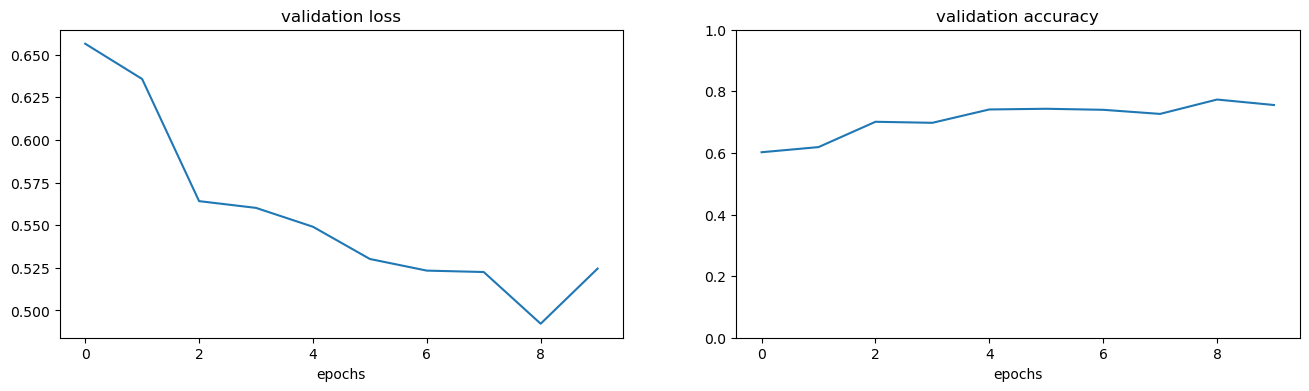

In [15]:
# Let's plot the validation loss and validation accuracy over time.
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [16]:
# We can also get a final evaluation by running our model on the training set. Doing so, we get the following results:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Test loss: 0.5016043186187744
Test accuracy: 0.7655555605888367


# 07. Transfer learning

In [24]:
# Download VGG16 weights.
# Transfer learning by starting with existing network
#vgg = keras.applications.VGG16(weights='imagenet', include_top=True)

vgg = VGG16(weights='imagenet', include_top=True)

vgg.summary()

553476096/553467096 [==============================] - 87s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [25]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


In [26]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# 08. Treinamento da Rede Neural com Novo Parametro

In [27]:
history2 = model_new.fit(x_train, y_train, 
                         batch_size=128, 
                         epochs=10, 
                         validation_data=(x_val, y_val))

Epoch 1/10
33/33 [==============================] - 3660s 111s/step - loss: 0.6018 - accuracy: 0.7110 - val_loss: 0.4004 - val_accuracy: 0.8422
Epoch 2/10
33/33 [==============================] - 3659s 111s/step - loss: 0.3551 - accuracy: 0.8607 - val_loss: 0.3264 - val_accuracy: 0.8833
Epoch 3/10
33/33 [==============================] - 3659s 111s/step - loss: 0.3095 - accuracy: 0.8752 - val_loss: 0.2862 - val_accuracy: 0.8878
Epoch 4/10
33/33 [==============================] - 3636s 111s/step - loss: 0.2773 - accuracy: 0.8936 - val_loss: 0.2631 - val_accuracy: 0.9011
Epoch 5/10
33/33 [==============================] - 3767s 115s/step - loss: 0.2582 - accuracy: 0.8995 - val_loss: 0.2520 - val_accuracy: 0.9022
Epoch 6/10
33/33 [==============================] - 4039s 123s/step - loss: 0.2453 - accuracy: 0.9052 - val_loss: 0.2381 - val_accuracy: 0.9078
Epoch 7/10
33/33 [==============================] - 3844s 117s/step - loss: 0.2429 - accuracy: 0.9038 - val_loss: 0.2474 - val_accuracy:

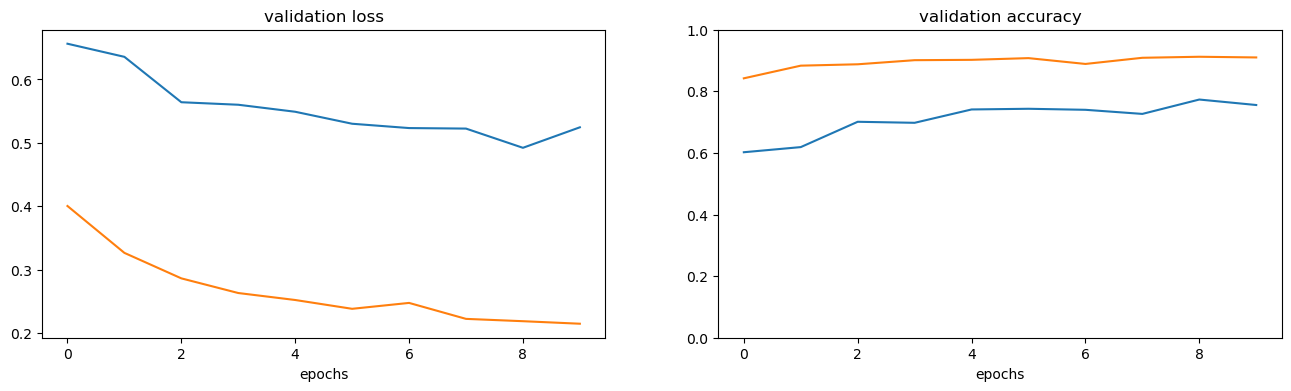

In [29]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [30]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.20363062620162964
Test accuracy: 0.9266666769981384


In [44]:
img, x = get_image('C:/Users/Documents/DIO/ml_transfer/PetImages/Cat/2988.jpg')
probabilities = model_new.predict([x])
print(probabilities)


[[0.5726282  0.42737177]]


# 09. Conclusao

Para realizar o desafio foi utilizado o projeto base sugerido no modulo Machine Learning (Transfer Learning com o Dataset do MNIST). No entanto, foram necessários ajustes no acesso as bibliotecas devido a descontinuacao da versao utilizado no projeto base.

Não foi possivel executar o projeto no ambiente COLAB, devido a restricao de recursos de maquina virtual disponibilizado na assinatura do COLAB "Free". Em substituicao ao Colab, foi utilizado o Jupyter Notebook desktop.

O dataset "Cats_vs_Dogs" (contem 50k em imagens) foi reduzido para 6k de imagens para otimizar o tempo de execucao do modelo.

O objetivo de aplicar o modelo de Machine Learning - Transfer Learning, com o dataset de duas classes (Cats e Dogs), foi concluido com sucesso tendo como resultado os seguintes valores:

- Processo de validacao: 76% de acuracia
- Retreino da rede neural com novo parametro: 92% de acuracia

Resultados positivos obtidos na primeira execucao, no entanto, recomenda-se um refinamento aumentando o dataset, pois, os valores obtidos estao acima dos valores atingidos pelo projeto referencia, os quais utilizaram um dataset com dimensoes maiores.




